In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import math as math
import datetime as datetime

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-02-17 15:55:48.484987: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 15:55:48.485084: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 15:55:48.486877: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-17 15:55:48.494350: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  1


2024-02-17 15:55:51.387883: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 15:55:51.397729: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 15:55:51.397792: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  rotation_range=30,
  width_shift_range=0.25,
  height_shift_range=0.25,
  zoom_range = [0.5, 1.5]
)

test_split = 0.2

# Load the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(train.shape)
print(test.shape)

# Split the data into X and y
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]
X_test = test.iloc[:, 0:784]

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state = 1212)

# Reshape the data
x_train_re = X_train.to_numpy().reshape(33600, 28, 28) # reshape to 28x28 images and 80% of the data
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28) # reshape to 28x28 images and 20% of the data
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)  # reshape to 28x28 images all test data

# Add color channel to the images
x_train_chan = x_train_re.reshape(x_train_re.shape[0], 28, 28, 1)
x_validation_chan = x_validation_re.reshape(x_validation_re.shape[0], 28, 28, 1)
x_test_chan = x_test_re.reshape(x_test_re.shape[0], 28, 28, 1)

x_train_norm = x_train_chan / 255.0 # normalize the data
x_validation_norm = x_validation_chan / 255.0 # normalize the data
x_test_norm = x_test_chan / 255.0 # normalize the data

(42000, 785)
(28000, 784)


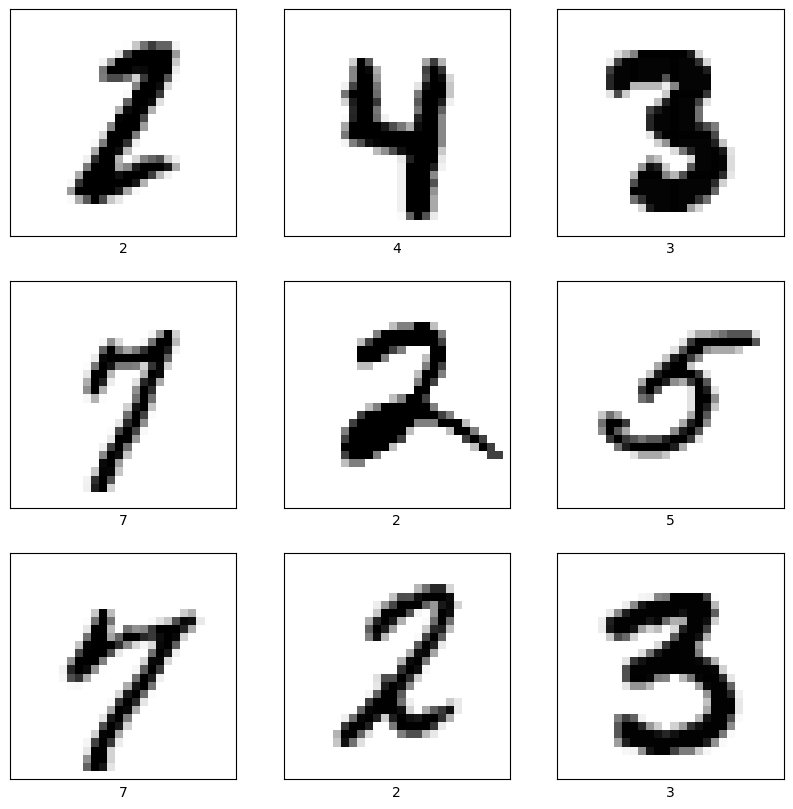

In [3]:
# Print some training examples
numbers_to_display = 9
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation=tf.keras.activations.relu, input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation=tf.keras.activations.relu),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=96, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])

# Desctipe the model
model.summary()

# Show model plotted
# tf.keras.utils.plot_model(
#     model,
#     show_shapes=True,
#     show_layer_names=True,
# )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

2024-02-17 15:56:18.818178: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 15:56:18.818293: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 15:56:18.818334: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 15:56:19.333797: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 15:56:19.333851: I external/local_xla/xla/stream_executor

In [5]:
# Compile the model with adam
# adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [6]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_norm,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_norm, y_validation_re),
    callbacks=[tensorboard_callback]
)
print("The model has successfully trained")

2024-02-16 21:25:36.772103: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 105369600 exceeds 10% of free system memory.


Epoch 1/10
1049/1050 [============================>.] - ETA: 0s - loss: 0.4214 - accuracy: 0.8808

2024-02-16 21:25:49.664758: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26342400 exceeds 10% of free system memory.


1050/1050 [==============================] - 14s 12ms/step - loss: 0.4215 - accuracy: 0.8808 - val_loss: 0.2608 - val_accuracy: 0.9310
Epoch 2/10
   7/1050 [..............................] - ETA: 10s - loss: 0.2523 - accuracy: 0.9330

2024-02-16 21:25:51.397466: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 124600320 exceeds 10% of free system memory.


1050/1050 [==============================] - 12s 11ms/step - loss: 0.3837 - accuracy: 0.9027 - val_loss: 0.2228 - val_accuracy: 0.9412
Epoch 3/10
   7/1050 [..............................] - ETA: 9s - loss: 0.4132 - accuracy: 0.9152 

2024-02-16 21:26:03.113256: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 124600320 exceeds 10% of free system memory.


1050/1050 [==============================] - 12s 11ms/step - loss: 0.3747 - accuracy: 0.9102 - val_loss: 0.2455 - val_accuracy: 0.9471
Epoch 4/10
  13/1050 [..............................] - ETA: 9s - loss: 0.4358 - accuracy: 0.8966 

2024-02-16 21:26:15.105873: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 124600320 exceeds 10% of free system memory.


1050/1050 [==============================] - 11s 10ms/step - loss: 0.3732 - accuracy: 0.9144 - val_loss: 0.3146 - val_accuracy: 0.9329
Epoch 5/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.3609 - accuracy: 0.9197 - val_loss: 0.3685 - val_accuracy: 0.9379
Epoch 6/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.4133 - accuracy: 0.9161 - val_loss: 0.2807 - val_accuracy: 0.9463
Epoch 7/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.3648 - accuracy: 0.9232 - val_loss: 0.4948 - val_accuracy: 0.9556
Epoch 8/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.3761 - accuracy: 0.9232 - val_loss: 0.3201 - val_accuracy: 0.9558
Epoch 9/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.3718 - accuracy: 0.9215 - val_loss: 0.4408 - val_accuracy: 0.9543
Epoch 10/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.3896 - accuracy: 0.9207 - val_loss: 0.5021 - val_accur

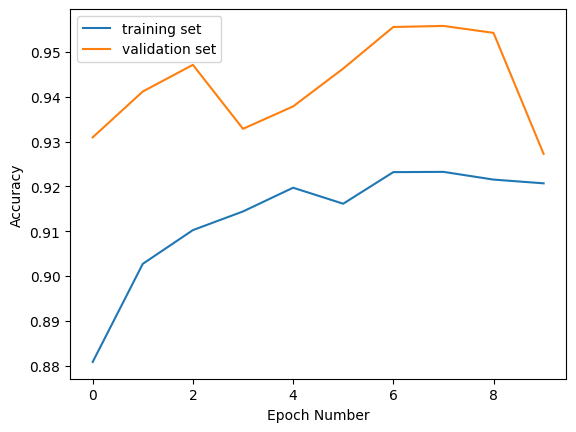

In [7]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [8]:
model.save('digits-model-AD.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
!tensorflowjs_converter --input_format keras digits-model-AD.h5 ./builds/AD

2024-02-17 16:28:54.908661: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 16:28:54.908839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 16:28:54.935544: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-17 16:28:55.023062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
X_np = X.to_numpy().reshape(X.shape[0], 28, 28, 1)

X_train_s = X[:35700].to_numpy().reshape(35700, 28, 28, 1)
X_validation_s = X[35700:].to_numpy().reshape(6300, 28, 28, 1)

y_train_s = y[:35700]
y_validation_s = y[35700:]

# Normalize the data
X_train_s = X_train_s.astype('float32') / 255
X_validation_s = X_validation_s.astype('float32') / 255

datagen.fit(X_train_s)

In [21]:
data_gen_train = datagen.flow(X_train_s, y_train_s, batch_size=32)

model.fit(
  data_gen_train,
  epochs=100, batch_size=32,
  validation_data=(X_validation_s, y_validation_s),
  steps_per_epoch=int(np.ceil(len(X_train_s) / float(32))),
  validation_steps=int(np.ceil(len(X_validation_s) / float(32)))
)

Epoch 1/100
1116/1116 [==============================] - ETA: 0s - loss: 1.2677 - accuracy: 0.5784

2024-02-17 16:40:23.203819: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19756800 exceeds 10% of free system memory.


1116/1116 [==============================] - 17s 15ms/step - loss: 1.2677 - accuracy: 0.5784 - val_loss: 0.2619 - val_accuracy: 0.9344
Epoch 2/100
1116/1116 [==============================] - 17s 15ms/step - loss: 0.7931 - accuracy: 0.7476 - val_loss: 0.1463 - val_accuracy: 0.9587
Epoch 3/100
1116/1116 [==============================] - 16s 14ms/step - loss: 0.6485 - accuracy: 0.7930 - val_loss: 0.1151 - val_accuracy: 0.9673
Epoch 4/100
1116/1116 [==============================] - 18s 16ms/step - loss: 0.5782 - accuracy: 0.8147 - val_loss: 0.0970 - val_accuracy: 0.9705
Epoch 5/100
1116/1116 [==============================] - 17s 15ms/step - loss: 0.5205 - accuracy: 0.8332 - val_loss: 0.0784 - val_accuracy: 0.9744
Epoch 6/100
1116/1116 [==============================] - 20s 18ms/step - loss: 0.4630 - accuracy: 0.8520 - val_loss: 0.0783 - val_accuracy: 0.9760
Epoch 7/100
1116/1116 [==============================] - 19s 17ms/step - loss: 0.4457 - accuracy: 0.8582 - val_loss: 0.0705 - val_

KeyboardInterrupt: 